# Disney Rating Text Analysis and Classification
## Author Kiana Gonzalez-Rodholm
### Part 1

As a Cast Member who works for the Walt Disney Company, I often hear my coworkers have the conversation, "Which resort is better?" to which there is often a lively discussion of what makes them more favorable. After finding some trip advisor data on three different resorts, I wanted to discover what truly makes the resort most favorable. The data I have found has features such as a 1-5 ranking of satisfaction, review comments, and graphical information regarding the Guests to those who have visited either the Disneyland Resort in California, Hong Kong Resort, or Paris Disneyland. There are over 32,000 entries of data to explore here in this data set. First, I will look at the rankings of each resort to see which one had a higher satisfaction rating, and then use text analysis and extraction as we have learned from previous weeks to find those with positive reviews in their comments. This will give a better understanding of which resort has the highest performance in Guest satisfaction. In order to further solve a realistic business problem, I will also try to predict what review revieved certain ratings and perhaps provide incite as to how that situation could or could have been remedied to prevent the concern from happening again. I am quite certain there are positions in the company currently to try to solve this exact problem, whether by going through each comment individually or by using machine learning techniques as well. I intend to build my own model and analysis to see what truly makes a Disney experience magical. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick

# load data into a data frame
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')

df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [2]:
# check dimensions of file
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (42656, 6)


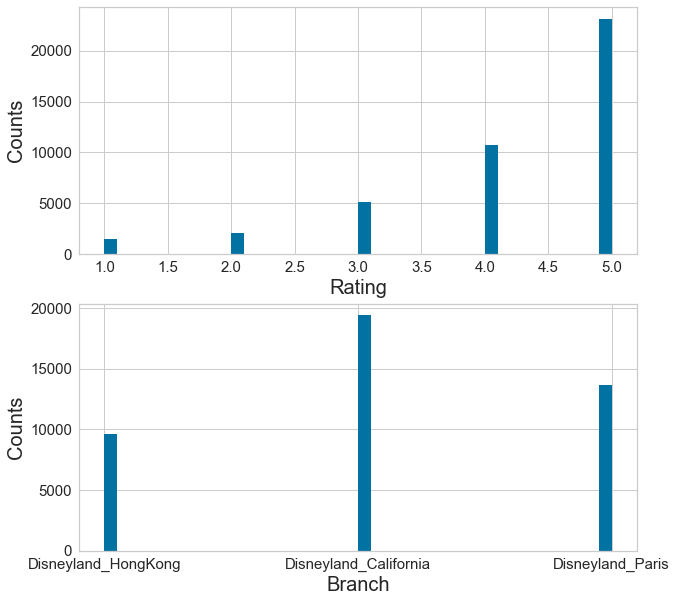

In [3]:
# create histograms of the data to see if sample size is consistant across parks

# set up the figure size
plt.rcParams['figure.figsize'] = (10, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 1)

# Specify the features of interest
num_features = ['Rating', 'Branch']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

As we can see from these few histograms, the Disney Resorts overall had high ranking, meaning Guests were mostly satisfied with their visit no matter which parks they went to. You can also see that the Disneyland Resort in California tended to have higher rankings than the other resorts. I was surprised to see Hong Kong being lower than Disneyland Paris, as I have heard all great things about Hong Kong, but perhaps the sample size is just smaller. Note that the rankings are in integers and therefore may not reflect an even sampling across resorts. 

In [4]:
# make a subset of the data and transpose it to have rows as columns
df1 = df[['Rating', 'Branch']]
df1.transpose()
df1.head()

,Rating,Branch
0,4,Disneyland_HongKong
1,4,Disneyland_HongKong
2,4,Disneyland_HongKong
3,4,Disneyland_HongKong
4,4,Disneyland_HongKong


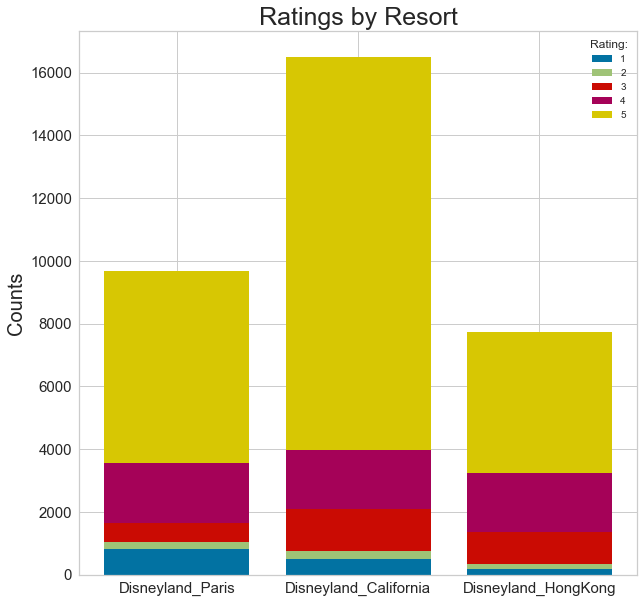

In [5]:
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 10)

# make the data read to feed into the visulizer
rating1 = df1[df1['Rating']==1]['Branch'].value_counts()
rating2 = df1[df1['Rating']==2]['Branch'].value_counts()
rating3 = df1[df1['Rating']==3]['Branch'].value_counts()
rating4 = df1[df1['Rating']==4]['Branch'].value_counts()
rating5 = df1[df1['Rating']==5]['Branch'].value_counts()

# make the stacked bar plot
p1 = plt.bar(rating1.index, rating1.values)
p2 = plt.bar(rating2.index, rating2.values, bottom=rating1.values)
p3 = plt.bar(rating3.index, rating3.values, bottom=rating2.values)
p4 = plt.bar(rating4.index, rating4.values, bottom=rating3.values)
p5 = plt.bar(rating5.index, rating5.values, bottom=rating4.values)
plt.title('Ratings by Resort', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(labels=['1','2','3','4','5'], title = 'Rating:')

This graph was the toughest to create but gives us a ton of information. With the stacked bar chart we can now see the distribution of each ranking for each resort. As you can see they all have high 5 star ratings which is indicitive of the histograms above, and we can also see that although Hong Kong has the lowest amount of data, they have the least amount of 1 ratings. All three locations seem to have approximatelty the same amount of 4 and 2 star ratings, but that California has a bit more 3 star ratings and a ton more 5 star ratings than the rest of the resorts. 

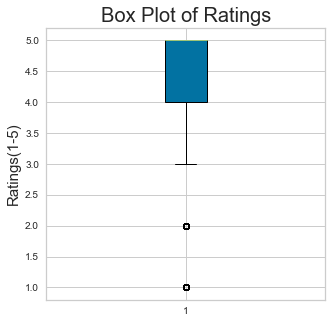

In [6]:
plt.rcParams['figure.figsize'] = (5, 5)

# box plot of Ratings
plt.boxplot(df.Rating, vert=True, patch_artist=True)  # patch_artist adds color
plt.title('Box Plot of Ratings', fontsize=20)
plt.ylabel('Ratings(1-5)', fontsize=15)
plt.show()

What this box plot shows us is another example of the distribution of all of the ratings for all locations. Most of the data is a between a 3-5 rating and there are small amounts of 1-2 ratings. These are so far outside the mean that they look like outliers from this graph.

In [7]:
# remove blanks from countries
df['Reviewer_Location'].dropna()

# find number of unique locations
loc_df = df.groupby('Reviewer_Location').nunique()

# remove countries with less than 150 instances to reduce number of entries
# used ID since those values are already unique
loc_df.drop(loc_df[loc_df['Review_ID']<150].index, inplace = True)
loc_df.head()

,Review_ID,Rating,Year_Month,Review_Text,Branch
Reviewer_Location,,,,,
Australia,4676,5,109,4676,3
Canada,2234,5,106,2232,3
China,181,5,76,181,3
France,243,5,84,243,3
Germany,194,5,79,194,3


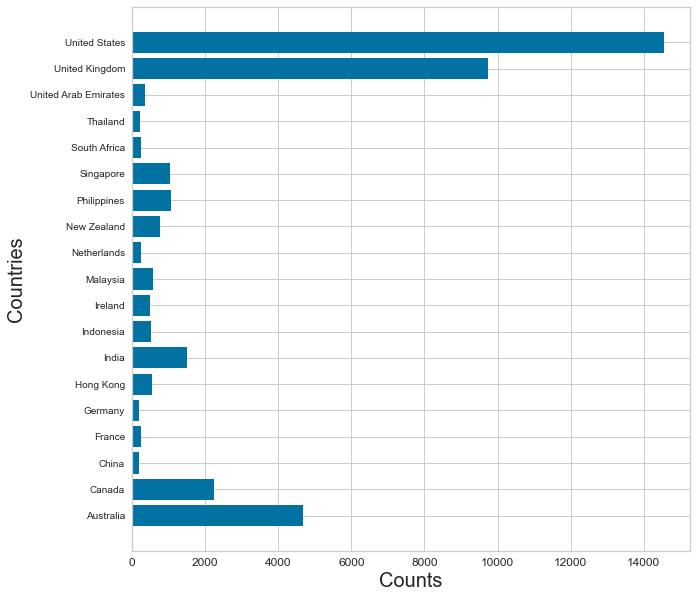

In [8]:
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 10)

# histogram of countries (by way of a bar chart)
plt.barh(loc_df.index, loc_df.Review_ID)
plt.xlabel('Counts', fontsize=20)
plt.ylabel('Countries', fontsize=20)
plt.tick_params(axis= 'x', labelsize=12)
plt.show()

We can see here in this bar chart the different distributions of visitors and what countries they have come from. No surprise to see the UK and US being the top two countries where people come from to visit the parks. Australia also has a very high amount of Guests. I know that they often come to the California site quite often since it's the closest for them and they dont have a Disney park in their country. It also makes sense that all of the English speaking contries were the top reviewers as that is the language in which this sample was taken in. There were a lot more countries in this data but in order to see more clearly and visualize the top countries, I removed any countries that had less than 150 entries. Other than those three we can see that Canada, India, New Zealand, Philipines, and Singapore are among the other top contenders.

#### Overview/Conclusion
Overall these graphs give us a pretty good incite into the categorical and numerical variables in this data set. A majority of the ratings for all the Disney locations were positive, with mostly 5 star ratings, with California being the most highly rated. There seems to be the most data collected for California, with Paris and Hong Kong being a bit less. We also were able to look at the different countries of visitors to see where most of the reviews were coming from. It was apparent that the English speaking countries such as the US, UK, Canada, and Australia were among the top reviewers. I have yet to look at the text data for the actual reviews, which will be the focus of the next milestone.

### Part 2

Drop any features not useful for model building. Review ID is dropped because it is an arbitrary number given for each review which has no relevance to the actual review. I also decided to drop the date as although it might be helpful for other projects, the date at which the review was given is not needed for this particular project. 

In [9]:
# drop ID and date variable 
df.drop(['Review_ID', 'Year_Month'], axis=1, inplace=True)

Drop missing values. There is enough data to drop rows with missing data and still have a good sample size.

In [10]:
df.dropna(inplace=True)
df.head()

,Rating,Reviewer_Location,Review_Text,Branch
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


Next I will create a new feature from the review text data in order to begin the modeling process. I will remove casing and punctuation.

In [11]:
# make text data lowercase
df['Review_Text'] = df.Review_Text.str.lower()

In [12]:
# remove punctuation
import unicodedata
import sys

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# For each string, remove any punctuation characters
df['Review_Text'] = [string.translate(punctuation) for string in df['Review_Text']]

df.head()

,Rating,Reviewer_Location,Review_Text,Branch
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong
4,4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong


Having this cleaned data will allow me to further analyze the text data for the next milestone.

### Part 3

After working on some of the exercises for the week, I noticed how there was a very similar parallels between the assignment and my data. We had a categorical rating system that we wanted to see if we could predict the rating based off of some text based data or reviews. This is exactly what we have here in this case as well. So in order to predict which rating a Disney Resort will get based on the reviews, we will use a few machine learning algorithms to find a good model for the data. We wil start by converting each text entry into a TFIDF vector in order to place into the model.

In [13]:
# convert each entry into a term frequency-inverse document frequency (tfidf) vector
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# get sample from text
sample = df.Review_Text.sample(n=500)
text_data = np.array(sample)

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text_data)

# view tf-idf feature matrix to a dense matrix
tfidf_matrix = tfidf_matrix.toarray()

Next we will place the TFIDF matrix into the Naive Bayes classifier which is one of the more common machine learning algorithms just to see what we can gather from this model. 

In [14]:
# start with a Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

y_test = df.Rating.sample(n=500)
nn1 = MultinomialNB().fit(tfidf_matrix, y_test)

# mean of model
predicted = nn1.predict(tfidf_matrix)
np.mean(predicted == y_test)

0.568

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

# shows confusion matrix
print(confusion_matrix(y_test, predicted))

[[  0   0   0   0  12]
 [  0   0   0   0  25]
 [  0   0   0   0  51]
 [  0   0   0   0 128]
 [  0   0   0   0 284]]


In [16]:
# shows accuracy, precision, recall, f-1 score
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00       128
           5       0.57      1.00      0.72       284

    accuracy                           0.57       500
   macro avg       0.11      0.20      0.14       500
weighted avg       0.32      0.57      0.41       500



C:\Users\krodh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see the Naive Bayes model was only a little over 50% effective at predicting the rating based off of the text review. Next we will try the support vector machines (SVM) algorithm to get a better result. I decided to try this algorithm because it provded us with a better result in the homework assignment as well. 

In [17]:
# now let's try a SVM algorthim
from sklearn.linear_model import SGDClassifier

nn2 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42).fit(tfidf_matrix, y_test)

# mean of model
predicted2 = nn2.predict(tfidf_matrix)
np.mean(predicted2 == y_test)

0.988

In [18]:
# shows confusion matrix
print(confusion_matrix(y_test, predicted2))

[[ 11   0   0   0   1]
 [  0  25   0   0   0]
 [  0   0  51   0   0]
 [  0   0   0 123   5]
 [  0   0   0   0 284]]


In [19]:
# shows accuracy, precision, recall, f-1 score
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        51
           4       1.00      0.96      0.98       128
           5       0.98      1.00      0.99       284

    accuracy                           0.99       500
   macro avg       1.00      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



#### Overview/Conclusion
As we can see the SVM algorithm was a much better model than Naive Bayes in predicting the rating based off of the text reviews. We have almost 100% accuracy therefore this is a near perfect machine learning model. We do have a smaller sample size, so it's possible that a larger sample size would make the model less effective. For Milestone 4 I will continue to explore more methods and fine-tune some of my existing analysis.

### Part 4
To begin, I wanted to make the last graph a horizontal bar graph instead to make the countries and results more visible, so I went back to milestone 1 and adjusted that graph appropriately. I also limited the countries shown to a smaller amount as to only show the top countries found and not clutter up the graph. I also wanted to test to see if the SVM algorithm would still perform just as well with a larger sample than 500.

In [20]:
# create a larger tf-idf feature matrix and rerun the SVM model

# get sample from text
y_test2 = df.Rating.sample(n=5000)
sample2 = df.Review_Text.sample(n=5000)
text_data2 = np.array(sample2)

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
tfidf_matrix2 = tfidf.fit_transform(text_data2)

# view tf-idf feature matrix to a dense matrix
tfidf_matrix2 = tfidf_matrix2.toarray()

# SVM model
nn3 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42).fit(tfidf_matrix2, y_test2)

# mean of model
predicted3 = nn3.predict(tfidf_matrix2)
np.mean(predicted3 == y_test2)

0.5358

In [21]:
# shows confusion matrix
print(confusion_matrix(y_test2, predicted3))

[[   0    0    0    0  174]
 [   0    0    0    0  238]
 [   0    0    0    0  596]
 [   0    0    0    0 1313]
 [   0    0    0    0 2679]]


In [22]:
# shows accuracy, precision, recall, f-1 score
print(classification_report(y_test2, predicted3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       174
           2       0.00      0.00      0.00       238
           3       0.00      0.00      0.00       596
           4       0.00      0.00      0.00      1313
           5       0.54      1.00      0.70      2679

    accuracy                           0.54      5000
   macro avg       0.11      0.20      0.14      5000
weighted avg       0.29      0.54      0.37      5000



C:\Users\krodh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see the model is less effective on a larger sample size of the data, performing pretty much identically to the Naive Bayes algorithm in the first example with only around 50% accuracy. I decided then to further explore other models to see if there was a better fit for the large data set. I decided to then try a Keras model, and in order to do that I started by one-hot encoding the categorical variables. 

In [23]:
# One Hot Encoding categorical variables
one_hot = pd.get_dummies(df.Rating)

# add to dataframe
df = df.join(one_hot)
df

,Rating,Reviewer_Location,Review_Text,Branch,1,2,3,4,5
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong,0,0,0,1,0
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,0,0,0,1,0
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid wh...,Disneyland_HongKong,0,0,0,1,0
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,0,0,0,1,0
4,4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
42651,5,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,0,0,0,0,1
42652,5,Canada,2 adults and 1 child of 11 visited disneyland ...,Disneyland_Paris,0,0,0,0,1
42653,5,South Africa,my eleven year old daughter and myself went to...,Disneyland_Paris,0,0,0,0,1
42654,4,United States,this hotel part of the disneyland paris comple...,Disneyland_Paris,0,0,0,1,0


In [26]:
from keras.layers import Dense 
from keras.models import Sequential 

# pull a sample of one-hot encoded variables
y_test2 = df[[1, 2, 3, 4, 5]].sample(n=5000)

# define the keras model 
nn4 = Sequential() 
nn4.add(Dense(50, activation ='relu', input_shape = (10,19943)))
nn4.add(Dense(5, activation ='relu')) 
nn4.add(Dense(5, activation ='sigmoid'))

# complie the keras model
nn4.compile(loss ='binary_crossentropy', 
            optimizer ='adam',
            metrics =['accuracy'])

In [27]:
# fit the keras model on the dataset
nn4.fit(tfidf_matrix2, y_test2, epochs=25, batch_size=10)

Epoch 1/25
500/500 [==============================] - 20s 7ms/step - loss: 0.6594 - accuracy: 0.5169
Epoch 2/25
500/500 [==============================] - 4s 7ms/step - loss: 0.5556 - accuracy: 0.5278
Epoch 3/25
500/500 [==============================] - 4s 7ms/step - loss: 0.4534 - accuracy: 0.5392
Epoch 4/25
500/500 [==============================] - 4s 7ms/step - loss: 0.3738 - accuracy: 0.5586
Epoch 5/25
500/500 [==============================] - 3s 7ms/step - loss: 0.2896 - accuracy: 0.6944
Epoch 6/25
500/500 [==============================] - 4s 7ms/step - loss: 0.1990 - accuracy: 0.7650
Epoch 7/25
500/500 [==============================] - 4s 7ms/step - loss: 0.1295 - accuracy: 0.8816
Epoch 8/25
500/500 [==============================] - 4s 7ms/step - loss: 0.0835 - accuracy: 0.9529
Epoch 9/25
500/500 [==============================] - 4s 7ms/step - loss: 0.0472 - accuracy: 0.9850
Epoch 10/25
500/500 [==============================] - 4s 7ms/step - loss: 0.0296 - accuracy: 0.993

In [28]:
# evaluate the keras model to show metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# accuracy
_, accuracy = nn4.evaluate(tfidf_matrix2, y_test2)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 1s 3ms/step - loss: 1.1910e-04 - accuracy: 1.0000
Accuracy: 100.00


In [29]:
# make probability predictions with the model
predicted4 = nn4.predict(tfidf_matrix2)

# precision tp / (tp + fp)
precision = precision_score(y_test2.values.argmax(axis=1), predicted4.argmax(axis=1), average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test2.values.argmax(axis=1), predicted4.argmax(axis=1), average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2.values.argmax(axis=1), predicted4.argmax(axis=1), average='weighted')
print('F1 score: %f' % f1)

Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [30]:
# print confusion matrix
confusion_matrix(y_test2.values.argmax(axis=1), predicted4.argmax(axis=1))

array([[ 189,    0,    0,    0,    0],
       [   0,  245,    0,    0,    0],
       [   0,    0,  634,    0,    0],
       [   0,    0,    0, 1240,    0],
       [   0,    0,    0,    0, 2692]], dtype=int64)

As we can see, even with a higher sample size, the Keras model did an amazing job at predicting ratings using the text data. This is a 100% accuracy which is quite surprizing. This model is much more effective than the Naive Bayes or SVM algorithms. We now have a pretty solid model that we can use toward solving our business problem. 